# dict logic

In [1]:
from DAO import *
import dict_logic
import Kobert_class

logic2 = dict_logic.Logic()
dao = JjalDao()
def sentence_to_url2(x):
    logic2.komoran(x)
    logic2.Kobert(x)
    logic2.dao_split()
    address = logic2.result()
    urls_tmp = []
    for i in address:
        urls_tmp.append(dao.sel_main(i))

    urls = []
    for i in urls_tmp:
        urls.append(i.replace("\n",""))
    
    return urls

using cached model. /home/bigdata/work/SUNIL/.cache/kobert_v1.zip
using cached model. /home/bigdata/work/SUNIL/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece
using cached model. /home/bigdata/work/SUNIL/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


/home/bigdata/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [2]:
import time
start = time.time()  # 시작 시간 저장

user_text = '/hi 면접 떨어졌어ㅜ'
user_text = user_text.replace("/hi ","")
urls = sentence_to_url2(user_text)
urls

print("time :", time.time() - start) 

Img/19.jpg
Img/35.jpg
Img/10.jpg
time : 0.22378778457641602


In [3]:
import time
start = time.time()  # 시작 시간 저장

user_text = '/hi 최민수 권총 짤'
user_text = user_text.replace("/hi ","")
urls = sentence_to_url2(user_text)
urls

print("time :", time.time() - start) 

https://jjalbang.today/files/jjalbox/2015/03/85_55169c8522e98_1104.jpg

https://ohfun.net/contents/article/images/2019/0201/1549000316896142.jpg

https://jjalbang.today/files/jjalbox/2015/04/20150402_551cd9aaacbf2.jpg

time : 0.2293088436126709


In [4]:
import numpy as np
import multiprocessing
import requests
from PIL import Image
from io import BytesIO

def getRequest(func, args, timeout):
    manager = multiprocessing.Manager()
    return_dict = manager.dict()

    def function(return_dict):
        return_dict['value'] = func(*args)

    p = multiprocessing.Process(target=function, args=(return_dict,))
    p.start()
    p.join(timeout)

    if p.is_alive():
        p.terminate()
        p.join()
        raise TimeoutError
    else:
        return return_dict['value']

def url_to_array(x):
    urls=x
    new_img=[]
    for url in urls:
        try:
            res = getRequest(requests.get, args=(url,), timeout=10)
            img = Image.open(BytesIO(res.content)).convert('RGB')
            img_resize = img.resize((100,100))
    #         print(img_resize)
            num_img = np.array(img_resize)
    #         print(num_img.shape)
            new_img.append(num_img)
        except:
            print("timeout")
    return new_img

In [5]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.savefig('img_3.png', bbox_inches='tight', pad_inches=0)
    plt.show()

def array_to_image(x):
    new_img = x
    images = {'Image'+str(i+1): new_img[i] for i in range(len(new_img))}
    return images

In [7]:
def sentence_to_image2(x):
    user_text=x
    user_text = user_text.replace("/hi ","")
    urls = sentence_to_url2(user_text)
    new_img = url_to_array(urls)
    images = array_to_image(new_img)
    img_fin = display_multiple_img(images, 1, len(new_img))
    return user_text, urls

https://jjalbang.today/files/jjalbox/2016/08/20160818_57b5426a26694.gif

https://jjalbang.today/files/jjalbox/2017/12/20171209_5a2ad145ebf54.gif

https://jjalbang.today/files/jjalbox/2016/08/20160818_57b542341b63f.jpg



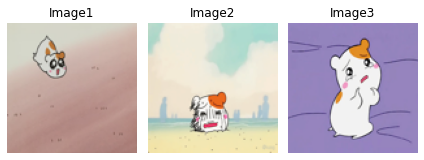

time : 1.143167495727539


In [10]:
import time
start = time.time()  # 시작 시간 저장
user_text, urls =  sentence_to_image2('/hi 면접 떨어졌어ㅜㅜ')
urls[0]
print("time :", time.time() - start)

https://jjalbang.today/files/jjalbox/2015/03/85_55169c8522e98_1104.jpg

http://file3.instiz.net/data/file3/2020/03/14/6/f/b/6fbb7943b3ef1f471b16c5fed25772aa.gif

https://jjalbang.today/files/jjalbox/2015/03/90_55169be836487_2752.jpg



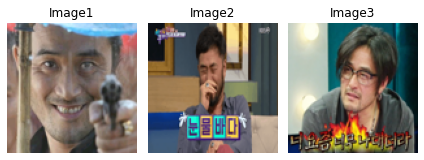

time : 1.1606698036193848


In [11]:
import time
start = time.time()  # 시작 시간 저장
user_text, urls =  sentence_to_image2('/hi 최민수 권총짤')
urls[0]
print("time :", time.time() - start)

In [ ]:
import telegram
from telegram import InlineKeyboardButton, InlineKeyboardMarkup, ChatAction, ReplyKeyboardMarkup
from telegram.base import TelegramObject
from telegram.ext import Updater, CommandHandler, CallbackQueryHandler
from telegram.ext import MessageHandler, Filters

my_api_key = "5089697893:AAFRwdsqMPSbYlmRG5Nv2FXJoH8Jk5_1emA"   #내 API 키 정보
chat_room_id = 5002900769   # 채팅방 ID

# 텔레그램 봇 세팅
my_bot = telegram.Bot(my_api_key)
updater = Updater(my_api_key)       # 봇에게 들어온 메시지가 있는지 체크
# print(updater.message)
# dispatcher = updater.dispatcher
# # updater.dispatcher.stop()
# # updater.job_queue.stop()
# # updater.stop()

#######################################################################################
urls2=[]
def cmd_task_buttons(update, context):
#     task_buttons = [[InlineKeyboardButton('Image1', callback_data=1 ),
#                      InlineKeyboardButton("Image2", callback_data=2 ),
#                      InlineKeyboardButton("Image3", callback_data=3 ),
#                      InlineKeyboardButton("종료", callback_data=9 )]]
    task_buttons = ['1', '2', '3', '4']
#     reply_markup = InlineKeyboardMarkup( task_buttons )
    reply_markup = ReplyKeyboardMarkup(task_buttons, one_time_keyboard=True)
    
    user_text = update.message.text
    user_text, urls = sentence_to_image(user_text)
    for i in urls:
        urls2.clear()
        print(i)
        urls2.append(i)
        
    
    context.bot.send_message(chat_id=update.message.chat_id, text=user_text)
    my_bot.sendPhoto(chat_id=update.message.chat_id, photo=open('img_3.png','rb'))
    context.bot.send_message(chat_id=update.message.chat_id, text='이미지 선택',
                             reply_markup=reply_markup)


def cb_button(update, context):
    query = update.callback_query
    data = query.data
    
    context.bot.send_chat_action(chat_id=update.effective_user.id,
                                 action=ChatAction.TYPING)
    if data=="1":
        my_bot.sendPhoto(chat_id=query.message.chat_id, photo=urls2[0])
        context.bot.edit_message_text(text=f"Image1 선택",
                                      chat_id=query.message.chat_id,
                                      message_id=query.message.message_id)
    elif data=="2":
        my_bot.sendPhoto(chat_id=query.message.chat_id, photo=urls2[1])
        context.bot.edit_message_text(text=f"Image2 선택",
                                      chat_id=query.message.chat_id,
                                      message_id=query.message.message_id)
    elif data=="3":
        my_bot.sendPhoto(chat_id=query.message.chat_id, photo=urls2[2])
        context.bot.edit_message_text(text=f"Image3 선택",
                                      chat_id=query.message.chat_id,
                                      message_id=query.message.message_id)
    elif data == "9":
        context.bot.edit_message_text(text=f"작업종료",
                                      chat_id=query.message.chat_id,
                                      message_id=query.message.message_id)
    


########################################################################################


# 기능과 명령어 연결
updater.dispatcher.add_handler(CommandHandler("hi", cmd_task_buttons))
updater.dispatcher.add_handler(CallbackQueryHandler(cb_button))




# 텔레그램 봇 시작
updater.start_polling()
updater.idle()

In [3]:
lst = [13, 22, 34]
lst = list(map(str, lst))
lst

['13', '22', '34']